In [1]:
import argparse
import os
import struct
import sys
import subprocess
import numpy
from numpy.linalg import det, inv, eig

1.Напишите скрипт, читающий во всех mp3-файлах указанной
директории ID3v1-теги и выводящий информацию о каждом файле в
виде: [имя исполнителя] - [название трека] - [название альбома].
Если пользователь при вызове скрипта задает ключ -d, то выведите
для каждого файла также 16-ричный дамп тега. Скрипт должен
также автоматически проставить номера треков и жанр (номер
жанра задается в параметре командной строки), если они не
проставлены. Используйте модуль struct.
ID3v1-заголовки располагаются в последних 128 байтах mp3-файла.

In [53]:
cmd = [sys.executable,'task1.py', 'Task1', '-d']
try:
    output = subprocess.check_output(cmd, stderr = subprocess.STDOUT,shell='True')
except subprocess.CalledProcessError as e:
    Error =  e.output 
    print(Error)
print(output)

b"b'54414757696e67656420487573736172730000000000000000000000000000000053616261746f6e0000000000000000000000000000000000000000000000546865204c617374205374616e6420284c696d697465642045646974696f32303136286d797a756b612e666d290000000000000000000000000000000000000a09'\r\n[ Sabaton ]  -  [ Winged Hussars ]  -  [ The Last Stand (Limited Editio ]\r\nb'544147436f6d61746f736500000000000000000000000000000000000000000000536b696c6c65740000000000000000000000000000000000000000000000436f6d61746f7365202844656c7578652045646974696f6e29000000000032303036536b696c6c657400000000000000000000000000000000000000000000050c'\r\n[ Skillet ]  -  [ Comatose ]  -  [ Comatose (Deluxe Edition) ]\r\nb'544147456e64204f6620416e20456d7069726500000000000000000000000000005475726973617300000000000000000000000000000000000000000000005374616e6420557020416e64204669676874000000000000000000000000000000004578616374417564696f436f70792076312e30623300000000000000000809'\r\n[ Turisas ]  -  [ End Of An Empire ]  -  [ Stand Up And Fight ]\r\

2.Напишите скрипт для информационной системы библиотеки. База
данных библиотеки включает таблицы «Авторы» с полями «id»,
«имя», «страна», «годы жизни», и «Книги» с полями «id автора»,
«название», «количество страниц», «издательство», «год издания»).
Необходимо производить авторизацию пользователей, логины и
пароли которых хранятся в отдельной таблице. Пароли должны
храниться в зашифрованном виде (например, хэш SHA-1 или MD5).
В программе должны быть окна для отображения информации о
всех книгах и авторах, окно добавления книги/автора. Реализуйте
также возможность сохранения информации о выделенном авторе в
файле в формате json или XML (по выбору пользователя). При
добавлении нового автора в базу допускается не заполнять поля в
соответствующем окне, а распарсить файл, указанный
пользователем (файл необходимо заранее создать и заполнить
информацией вручную, в текстовом редакторе). Для преобразования
в формат XML и json напишите собственный код; парсинг можно
делать с помощью сторонних библиотек. 

In [13]:
import sqlite3

3.Выполните задание № 2 средствами SQLAlchemy, включая создание
и редактирование таблиц, а также выполнение таких запросов, как:
- вывод фамилий всех авторов, родившихся в диапазоне между X и
Y годами (задайте программно числа X и Y);
- вывод всех книг, написанных авторами из России;
- вывод всех книг с количеством страниц более N;
- вывод всех авторов с числом книг более N.

4.Выполните задание № 3, используя в качестве базы данных NoSqlтехнологию MongoDB.

5.Напишите приложение для загрузки файлов из интернета. В главном
окне должно быть три текстовых поля, в которые можно вводить
URL файла на закачку; под каждым из текстовых полей должны
быть индикаторы загрузки и рядом поля с процентом загрузки
каждого файла. Необходимо организовать возможность качать от
одного до трех файлов параллельно (использовать потоки
обязательно, файлы загружать фрагментами по 4 Кб). Загрузка
должна инициироваться нажатием кнопки «Start downloading!». По
окончанию загрузки последнего файла должно появиться окно со
столбчатой диаграммой со значениями времени загрузки каждого
файла в формате «2s 322ms» и размерами файлов (используйте
библиотеку matplotlib).

<IPython.core.display.Javascript object>


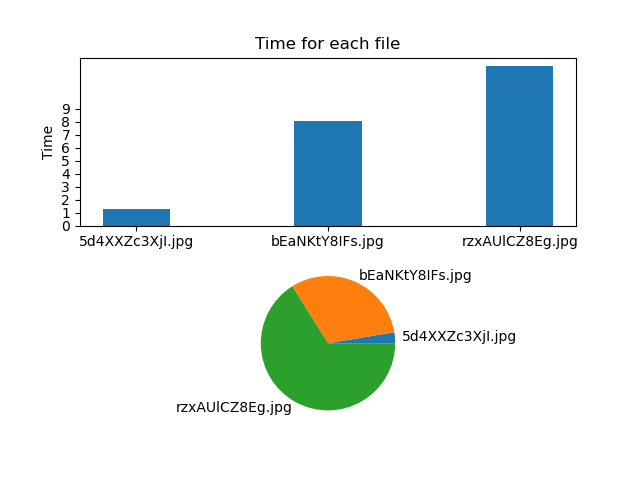

In [2]:
%gui qt
%matplotlib notebook
import os
import threading
import Task5Window
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from time import time
from PyQt5 import QtCore, QtWidgets

class Task5(QtWidgets.QMainWindow):
    def __init__(self):
        QtWidgets.QMainWindow.__init__(self)
        self.ui = Task5Window.Ui_MainWindow()
        self.ui.setupUi(self)
        self.ui.pushButton.clicked.connect(self.start_downloading)
        self.datas = []
        
        
    def start_downloading(self):
        T1 = threading.Thread(target = self.threading_func, args=(self.ui.lineEdit, self.ui.progressBar))
        T2 = threading.Thread(target = self.threading_func, args=(self.ui.lineEdit_2, self.ui.progressBar_2))
        T3 = threading.Thread(target = self.threading_func, args=(self.ui.lineEdit_3, self.ui.progressBar_3))
        T1.start()
        T2.start()
        T3.start()
        T1.join()
        T2.join()
        T3.join()
        self.matplot_stuff()
    
    def matplot_stuff(self):
        N = len(self.datas)
        timeMeans = np.array([i.time_to_download for i in self.datas])
        ind = np.arange(N)
        width = 0.35
        plt.subplot(2, 1, 1)
        plt.bar(ind, timeMeans, width)
        plt.ylabel('Time')
        plt.title('Time for each file')
        plt.xticks(ind, ([i.filename for i in self.datas]))
        plt.yticks(np.arange(0, 10, 1))
        
        plt.subplot(2, 1, 2)
        labels = [i.filename for i in self.datas]
        sizes = [i.size for i in self.datas]
        plt.pie(sizes, labels=labels)
        plt.show()
        
    
          
    def threading_func(self, line_edit : QtWidgets.QLineEdit, progress_bar : QtWidgets.QProgressBar):
        data = DownloadData()
        if self.ui.lineEdit.text() != '':
            start = time()
            url = line_edit.text()
            r = requests.get(url, stream=True)
            filename = url.split('/')[-1]
            data.filename = filename
            total_length = int(r.headers.get('content-length'))
            data.size = total_length
            progress_bar.setMaximum(total_length)
            with open(filename, "wb") as f:
                i = 0
                for chunk in r.iter_content(4):
                    i += 4
                    f.write(chunk)
                    progress_bar.setValue(i)
            time_to_dl = time() - start
            data.time_to_download = time_to_dl
            progress_bar.setValue(total_length)
            self.datas.append(data)
            
            
class DownloadData():
    def __init__(self):
        filename = ""
        time_to_download = ""
        size = ""
        
if __name__ == '__main__':
    app = QtCore.QCoreApplication.instance()
    if app is None:
        app = QtWidgets.QApplication(sys.argv)
    w = Task5()
    w.show()

    app.exec_()

6.С помощью модуля numPy реализуйте следующие операции: 1)
умножение произвольных матриц А (размерности 3х5) и В (5х2); 2)
умножение матрицы (5х3) на трехмерный вектор; 3) решение
произвольной системы линейных уравнений; 4) расчет определителя
матрицы; 5) получение обратной и транспонированной матриц.
Также продемонстрируйте на примере матрицы 5х5 тот факт, что
определитель равен произведению собственных значений матрицы

In [61]:
class MatrixActions():
    @staticmethod
    def multiply_matrix():
        print('1) ', end='')
        first_matrix = numpy.arange(3 * 5).reshape((3, 5))
        second_matrix = numpy.arange(5 * 2).reshape((5, 2))
        print('First matrix:\n', first_matrix)
        print('Second matrix:\n', second_matrix)
        print('Result of multiplication:\n', first_matrix @ second_matrix)

    @staticmethod
    def multiply_matrix_vector():
        print('2) ', end='')
        matrix = numpy.arange(2 * 3).reshape((3, 2))
        vector = numpy.array([1, -1], dtype=float)
        print('Matrix:\n', matrix)
        print('Vector:\n', vector)
        print('Result of multiplication:\n', matrix @ vector)

    @staticmethod
    def linear_equation_system():
        print('3) ', end='')
        print(' 11x + 33y = 131\n 42x - 28y = 96')
        matrix = numpy.array([[11., 33.], [42., -28.]])
        vector = numpy.array([131., 96.])
        print('Result:\n', numpy.linalg.solve(matrix, vector))

    @staticmethod
    def determinant():
        print('4) ', end='')
        matrix = numpy.arange(5 * 5).reshape((5, 5))
        print(det(matrix))

    @staticmethod
    def inverse_transposed():
        print('5)', end='')
        a = numpy.array([[6, 3, 5], [5, 2, 7], [7, 1, 6]])
        print('Matrix:\n', a)
        a_inversed = inv(a)
        print('Inversed matrix:\n', a_inversed)
        a_transposed = a.transpose()
        print('Transposed matrix:\n', a_transposed)

    @staticmethod
    def matrix_eigenvalues():
        print('6) ', end ='')
        a = numpy.array([[8, 4, 8], [7, 9, 4], [5, 2, 1]])
        print("Matrix:\n", a)
        q = eig(a)
        print("Matrix eigenvalues:\n", q[0])
        q_mult = numpy.prod(q[0])
        print("Their multiplication result: ", q_mult)
        d = det(a)
        print("Matrix determinant: ", d)
        
    @staticmethod
    def run_through_all():
        MatrixActions.multiply_matrix()
        MatrixActions.multiply_matrix_vector()
        MatrixActions.linear_equation_system()
        MatrixActions.determinant()
        MatrixActions.inverse_transposed()
        MatrixActions.matrix_eigenvalues()

        
if __name__ == '__main__':
    MatrixActions.run_through_all()

1) First matrix:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Second matrix:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Result of multiplication:
 [[ 60  70]
 [160 195]
 [260 320]]
2) Matrix:
 [[0 1]
 [2 3]
 [4 5]]
Vector:
 [ 1. -1.]
Result of multiplication:
 [-1. -1. -1.]
3)  11x + 33y = 131
 42x - 28y = 96
Result:
 [4.03541913 2.62455726]
4) 0.0
5)Matrix:
 [[6 3 5]
 [5 2 7]
 [7 1 6]]
Inversed matrix:
 [[ 0.11904762 -0.30952381  0.26190476]
 [ 0.45238095  0.02380952 -0.4047619 ]
 [-0.21428571  0.35714286 -0.07142857]]
Transposed matrix:
 [[6 5 7]
 [3 2 1]
 [5 7 6]]
6) Matrix:
 [[8 4 8]
 [7 9 4]
 [5 2 1]]
Matrix eigenvalues:
 [16.52483797  4.19023786 -2.71507583]
Their multiplication result:  -188.0000000000001
Matrix determinant:  -188.0


7.Выберите произвольную дифференцируемую и интегрируемую
функцию одной переменной. С помощью модуля symPy найдите и
отобразите ее производную и интеграл в аналитическом и
графическом виде. Напишите код для решения произвольного
нелинейного урванения и системы нелинейных уравнений.

Функция:  x**3
Derivative: 
   2
3⋅x 


<IPython.core.display.Javascript object>


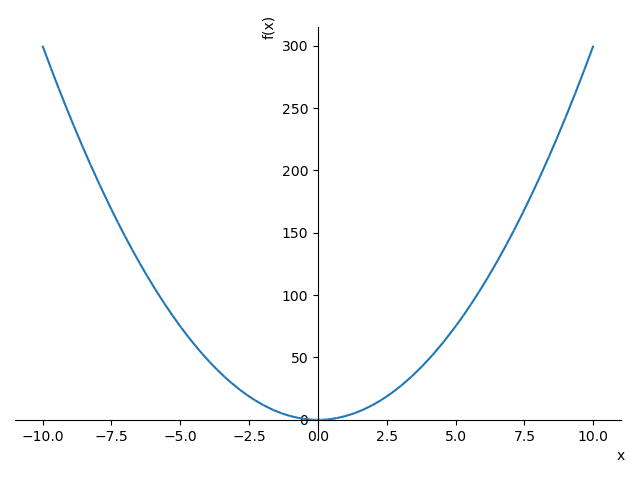


Integral: 
 4
x 
──
4 


<IPython.core.display.Javascript object>


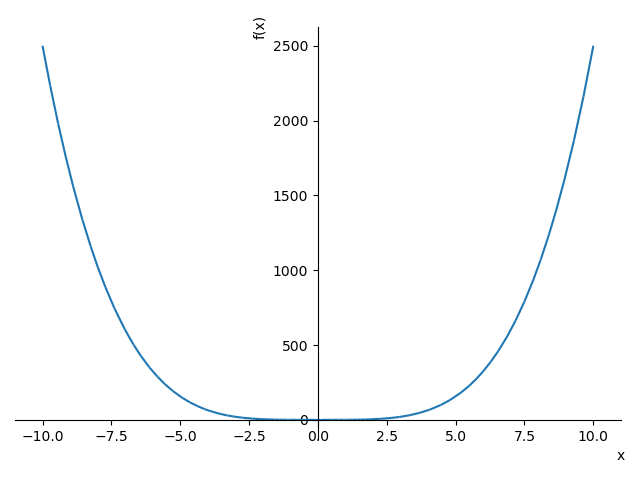

Equations system:

⎡                  ⎛-3⋅√2⋅ⅈ   √2⋅ⅈ⎞  ⎛3⋅√2⋅ⅈ  -√2⋅ⅈ ⎞⎤
⎢(-3, -2), (3, 2), ⎜────────, ────⎟, ⎜──────, ──────⎟⎥
⎣                  ⎝   2       2  ⎠  ⎝  2       2   ⎠⎦
Single equation:

[-2, 2]


In [6]:
%matplotlib notebook
import matplotlib
from sympy import *

def differentiation_and_integration():
    x = Symbol('x')
    func = x ** 3
    print('Функция: ', str(func))
    print('Derivative: ')
    differencial = diff(func)
    pprint(differencial)
    plot(differencial)
    print('\nIntegral: ')
    integral = integrate(func)
    pprint(integral)
    plot(integral)


def solving(*equations):
    if len(equations) == 1:
        return solve(equations[0])
    return solve_poly_system(equations)


def solve_equations():
    x, y = symbols('x y')
    equation1 = Equality(-9, x ** 2 - 3 * x * y)
    equation2 = Equality(-2, y ** 2 - x * y)
    equation3 = Equality(x ** 2, 4)
    print('Equations system:\n')
    pprint(solving(equation1, equation2))
    print('Single equation:\n')
    pprint(solving(equation3))


if __name__ == '__main__':
    differentiation_and_integration()
    init_printing()
    solve_equations()

8.Скачайте файл с информацией о всех государствах мира по адресу:
https://github.com/mledoze/countries/blob/master/dist/countries.csv. С
помощью модуля pandas отобразите: 1) 10 самых маленьких и самых
больших стран мира по территории; 2) 10 самых маленьких и самых
больших стран мира по населению; 3) все франкоязычные страны
мира; 4) только островные государства; 5) все страны, находящиеся
в южном полушарии. Сгруппируйте страны по первой букве; по
населению; по территории. Программно сохраните в таблицу Excel
все страны с выборочной информацией: название, столица,
население, территория, валюта, широта, долгота.

In [12]:
import csv
import pandas as pd
from pandas import read_csv

countries_file = 'countries.csv'

class WorkWithCSV:
    @staticmethod
    def save_to_excel(table):
        names = pd.Series([d.split(',')[0] for d in table.name])
        names.name = 'name'
        lat, lng = zip(*[d.split(',')
                         if isinstance(d, str)
                         else ['nan', 'nan']
                         for d in table.latlng])
        lat, lng = map(pd.Series, (lat, lng))
        lat.name = 'latitude'
        lng.name = 'longitude'
        for_export = pd.concat([names, table[['capital', 'ccn3', 'area', 'currencies']], lat, lng], axis=1)
        with pd.ExcelWriter('exported.xls') as excel_writer:
            for_export.to_excel(excel_writer)

            
    @staticmethod
    def show_info():
        table = read_csv(countries_file, ',')

        print('\nCountries with largest area\n')
        print(table.nlargest(n=10, columns='area')[['area', 'name']])  # 10 самых больших стран мира по территории
        print('\nCountries with smallest area\n')
        print(table.nsmallest(10, ['area'])[['area', 'name']])

        print('\nCountries with largest population\n')
        print(table.nlargest(10, ['ccn3'])[['ccn3', 'name']])  # 10 самых больших стран мира по населению
        print('\nCountries with smallest population\n')
        print(table.nsmallest(10, ['ccn3'])[['ccn3', 'name']])

        print('\nFrench speaking countries\n')
        print(table[table.languages == 'French'][['languages', 'area', 'name']])  # все франкоязычные страны мира

        print('\nCountries on islands\n')
        print(table[table.borders.isnull()][['name']])  # только государства-острова(ни с кем не граничат)
        save_to_excel(table=table)

        # все страны, находящиеся в южном полушарии
        print('\nCountries from Southern Hemisphere\n')
        print(table.where(pd.Series([float(str(d).split(',')[0]) < 0 for d in table.latlng])).name.dropna())

        for i, group in table.groupby(table.area):  # группировка по территории
        # for i, group in table.groupby(table.ccn3):  # группировка по населению
        # for i, group in table.groupby([d[0] for d in table.name]):  # Групировка по первой букве
            print(str(i) + ': ')
            for j, name in enumerate(group.name, 1):
                print(str(j) + '.', name.split(',')[0])


if __name__ == '__main__':
    WorkWithCSV.show_info()


Countries with largest area

           area                                               name
191  17098242.0  Russia,Russian Federation,Российская Федерация...
11   14000000.0                             Antarctica,Antarctica,
40    9984670.0          Canada,Canada,Canada,Canada,Canada,Canada
44    9706961.0        China,People's Republic of China,中华人民共和国,中国
235   9372610.0  United States,United States of America,United ...
33    8515767.0  Brazil,Federative Republic of Brazil,República...
14    7692024.0  Australia,Commonwealth of Australia,Commonweal...
105   3287590.0  India,Republic of India,Republic of India,Indi...
8     2780400.0  Argentina,Argentine Republic,Argentine Republi...
117   2724900.0  Kazakhstan,Republic of Kazakhstan,Қазақстан Ре...

Countries with smallest area

      area                                               name
198  -1.00  Svalbard and Jan Mayen,Svalbard og Jan Mayen,S...
237   0.44  Vatican City,Vatican City State,Stato della Ci...
140   2.02  Mona